In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [35]:
df=pd.read_csv("../data/processed/df_processed.csv")
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-1.148577,0.818182,-0.521215,-5.199338,0.166667,0.00,-1.567240,-1.334223,-0.988642,0.000000
1,1.028273,0.909091,-5.199338,1.931194,0.000000,0.25,0.793110,1.307333,0.872013,0.222222
2,0.802715,1.000000,0.414307,-5.199338,1.000000,0.00,0.911217,-0.307658,0.474946,0.000000
3,-0.068391,1.000000,-0.731896,-5.199338,0.083333,0.00,-1.132013,-0.235555,-0.163159,0.000000
4,0.557312,1.000000,0.780930,-5.199338,0.666667,0.00,-0.594353,0.377744,1.518141,0.000000


# Visualize Data

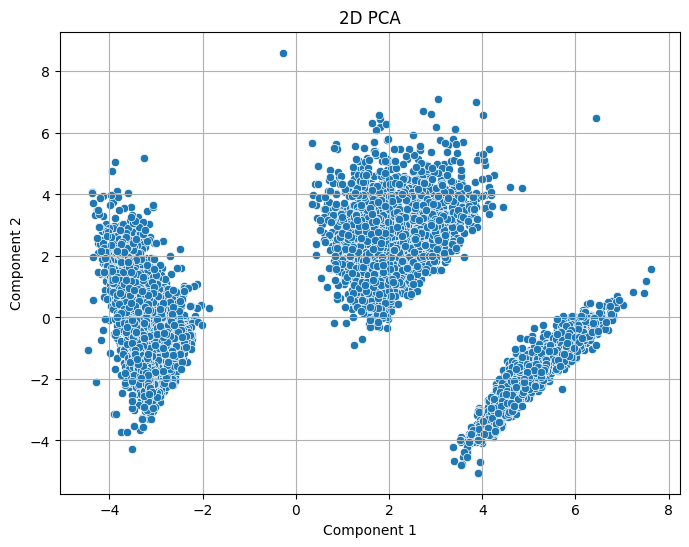

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)

pca_df_2d = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df_2d)
plt.title('2D PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


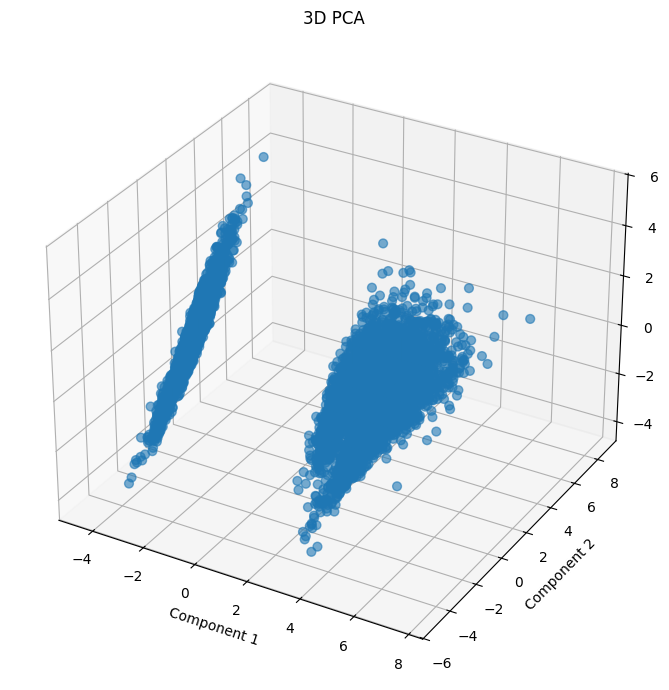

In [37]:

pca = PCA(n_components=3)
pca_3d = pca.fit_transform(df)

pca_df_3d = pd.DataFrame(pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d['PCA1'], pca_df_3d['PCA2'], pca_df_3d['PCA3'], s=40, alpha=0.6)
ax.set_title('3D PCA')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.tight_layout()
plt.show()


# K-means

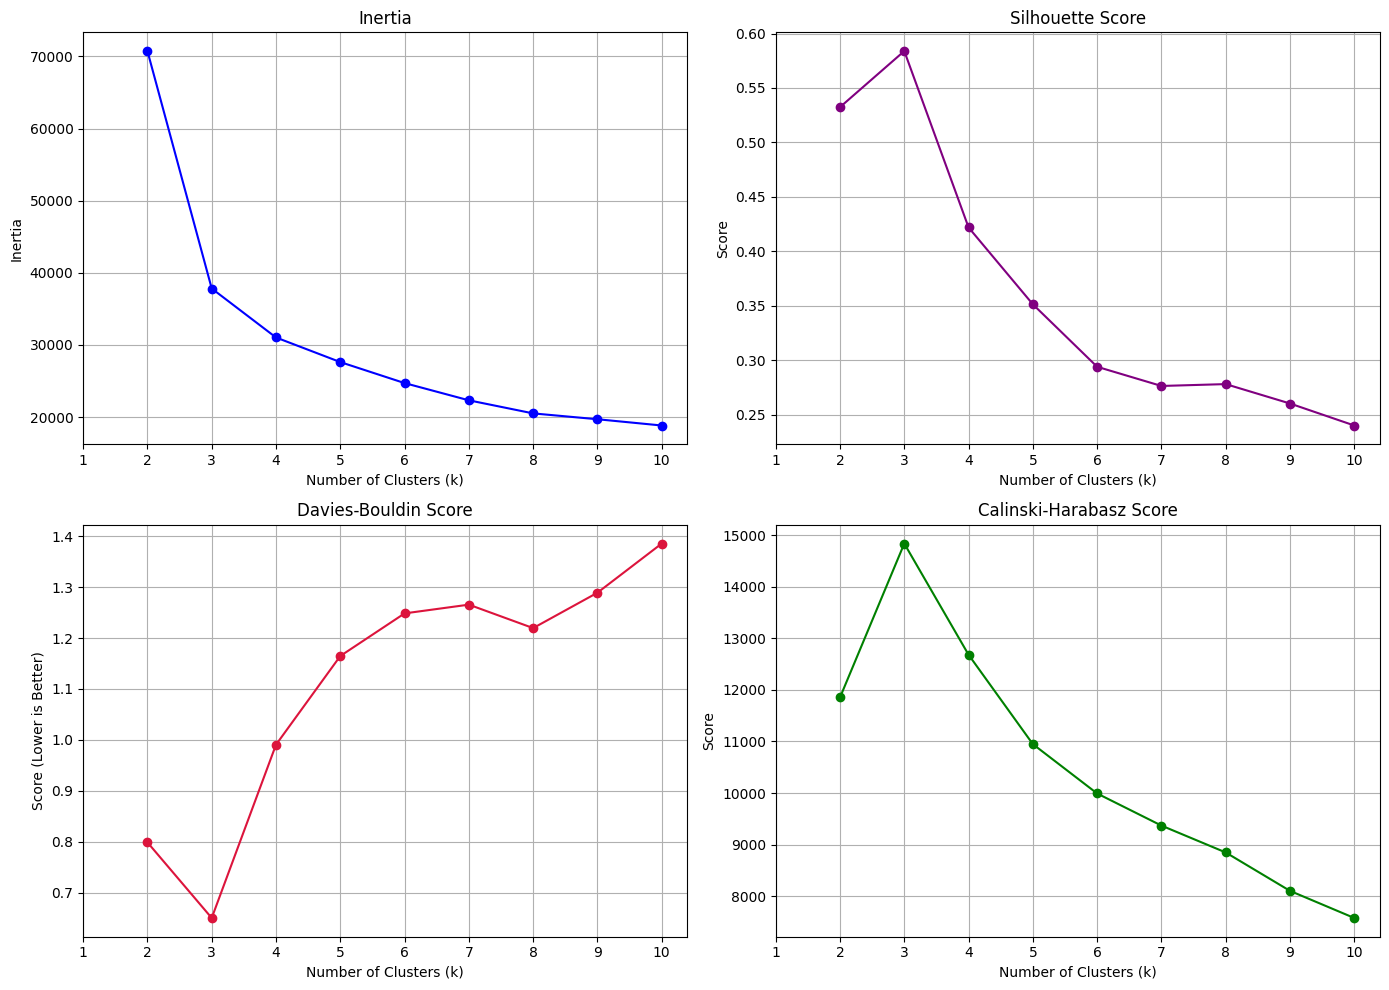

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

import numpy as np

# Parameters
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018

# Store scores
inertias = []
silhouettes = []
davies_scores = []
calinski_scores = []
ks = list(range(2, 11))  #

# Run KMeans and collect metrics
for k in ks:
    kmeans = KMeans(
        n_clusters=k,
        n_init=n_init,
        max_iter=max_iter,
        tol=tol,
        random_state=random_state
    )
    labels = kmeans.fit_predict(df.to_numpy())
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df.to_numpy(), labels))
    davies_scores.append(davies_bouldin_score(df.to_numpy(), labels))
    calinski_scores.append(calinski_harabasz_score(df.to_numpy(), labels))

# Set up 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
k_ticks = list(range(1, 11))  # x-axis: 1 to 10

# Plot Inertia
axs[0, 0].plot(ks, inertias, marker='o', color='blue')
axs[0, 0].set_title("Inertia")
axs[0, 0].set_xticks(k_ticks)
axs[0, 0].set_xlabel("Number of Clusters (k)")
axs[0, 0].set_ylabel("Inertia")
axs[0, 0].grid(True)

# Plot Silhouette Score
axs[0, 1].plot(ks, silhouettes, marker='o', color='purple')
axs[0, 1].set_title("Silhouette Score")
axs[0, 1].set_xticks(k_ticks)
axs[0, 1].set_xlabel("Number of Clusters (k)")
axs[0, 1].set_ylabel("Score")
axs[0, 1].grid(True)

# Plot Davies-Bouldin Score
axs[1, 0].plot(ks, davies_scores, marker='o', color='crimson')
axs[1, 0].set_title("Davies-Bouldin Score")
axs[1, 0].set_xticks(k_ticks)
axs[1, 0].set_xlabel("Number of Clusters (k)")
axs[1, 0].set_ylabel("Score (Lower is Better)")
axs[1, 0].grid(True)

# Plot Calinski-Harabasz Score
axs[1, 1].plot(ks, calinski_scores, marker='o', color='green')
axs[1, 1].set_title("Calinski-Harabasz Score")
axs[1, 1].set_xticks(k_ticks)
axs[1, 1].set_xlabel("Number of Clusters (k)")
axs[1, 1].set_ylabel("Score")
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


k=3 is the best in 4 graphs

In [135]:
from sklearn.cluster import KMeans

n_clusters = 3
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018

kmeans = KMeans(
    n_clusters=n_clusters,
    n_init=n_init,
    max_iter=max_iter,
    tol=tol,
    random_state=random_state  # Include this
)

kmeans.fit(df.to_numpy())
labels = kmeans.labels_


In [136]:
kmeans_labels = labels

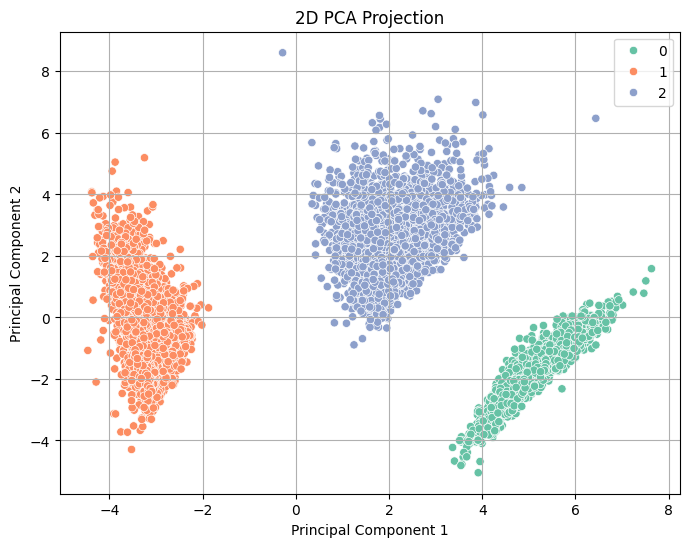

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2',hue=labels,palette='Set2', data=pca_df_2d)
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


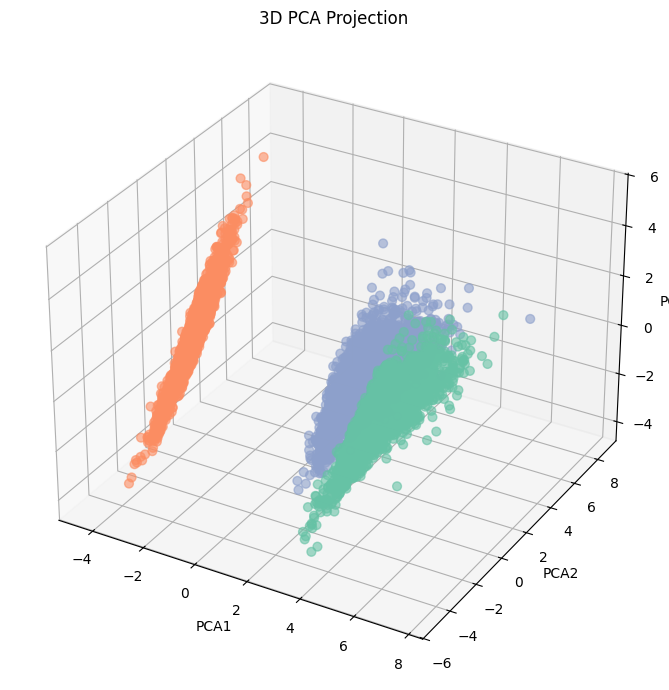

In [42]:
unique_labels = np.unique(labels)
colors = sns.color_palette('Set2', len(unique_labels))
label_color_map = dict(zip(unique_labels, colors))
point_colors = [label_color_map[label] for label in labels]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d['PCA1'], pca_df_3d['PCA2'], pca_df_3d['PCA3'], 
           c=point_colors, s=40, alpha=0.6)

ax.set_title('3D PCA Projection')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.tight_layout()
plt.show()


In [43]:
sil = silhouette_score(df.to_numpy(), labels)
ch = calinski_harabasz_score(df.to_numpy(), labels)
db = davies_bouldin_score(df.to_numpy(), labels)

print(f"Silhouette Score: {sil:.3f}")
print(f"Calinski-Harabasz Score: {ch:.3f}")
print(f"Davies-Bouldin Score: {db:.3f}")

Silhouette Score: 0.584
Calinski-Harabasz Score: 14834.455
Davies-Bouldin Score: 0.650


# Agglomerative Clustering

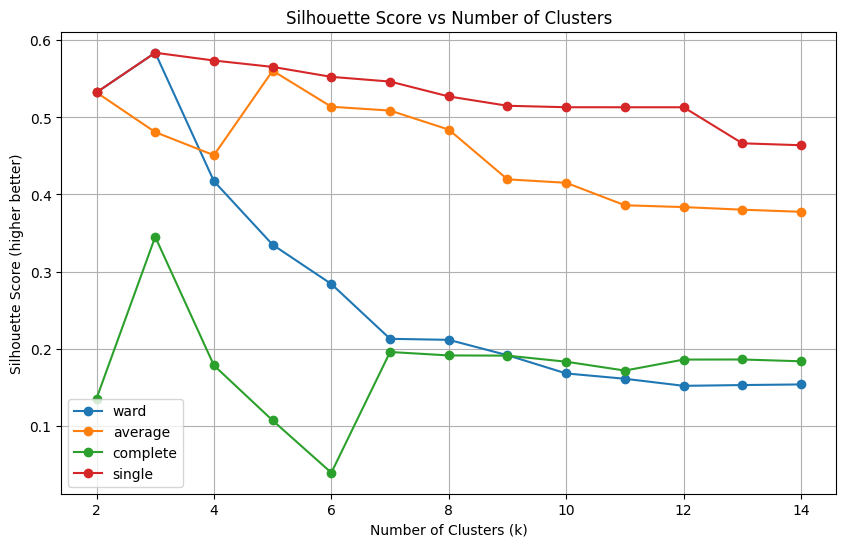

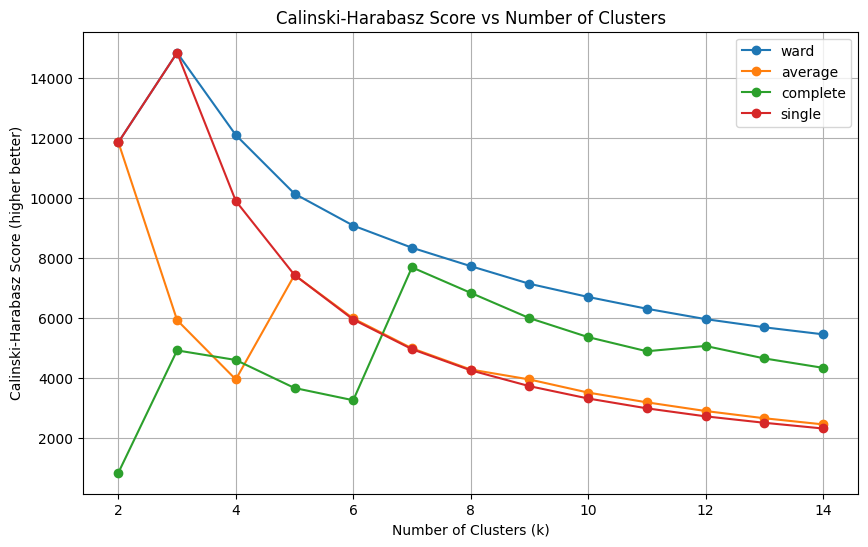

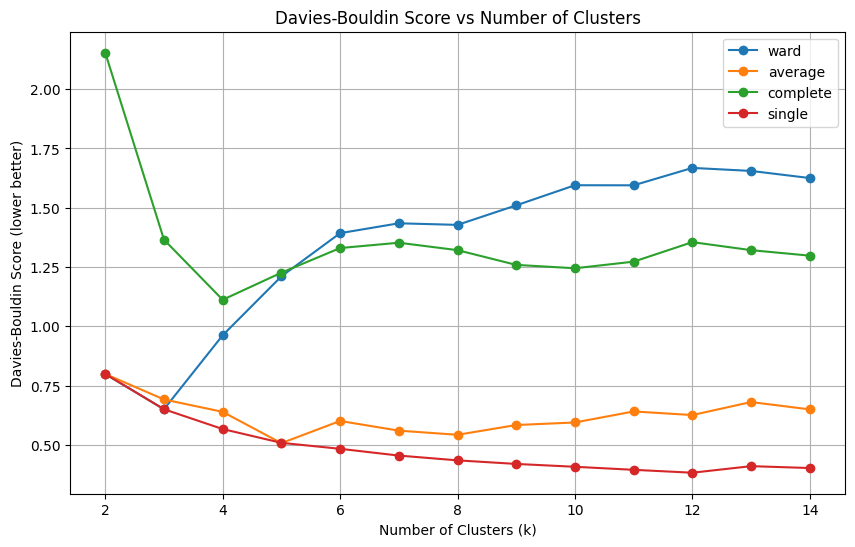

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = df.to_numpy()
linkage_methods = ['ward', 'average', 'complete', 'single']
ks = range(2, 15)

# Store metrics for each linkage method
silhouette_scores = {method: [] for method in linkage_methods}
calinski_scores = {method: [] for method in linkage_methods}
davies_scores = {method: [] for method in linkage_methods}

for method in linkage_methods:
    for k in ks:

        model = AgglomerativeClustering(n_clusters=k, linkage=method, metric='euclidean')
        labels = model.fit_predict(X)
        silhouette_scores[method].append(silhouette_score(X, labels))
        calinski_scores[method].append(calinski_harabasz_score(X, labels))
        davies_scores[method].append(davies_bouldin_score(X, labels))

def plot_metric(metric_dict, metric_name, ylabel):
    plt.figure(figsize=(10, 6))
    for method in linkage_methods:
        plt.plot(ks, metric_dict[method], marker='o', label=method)
    plt.title(f'{metric_name} vs Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric(silhouette_scores, 'Silhouette Score', 'Silhouette Score (higher better)')
plot_metric(calinski_scores, 'Calinski-Harabasz Score', 'Calinski-Harabasz Score (higher better)')
plot_metric(davies_scores, 'Davies-Bouldin Score', 'Davies-Bouldin Score (lower better)')


best one in all is single with k=3

In [138]:
from sklearn.cluster import AgglomerativeClustering

k=3
model = AgglomerativeClustering(
    n_clusters=k,        
    metric='euclidean',  
    linkage='single'  
)

labels = model.fit_predict(df.to_numpy())


In [139]:
agg_labels = labels

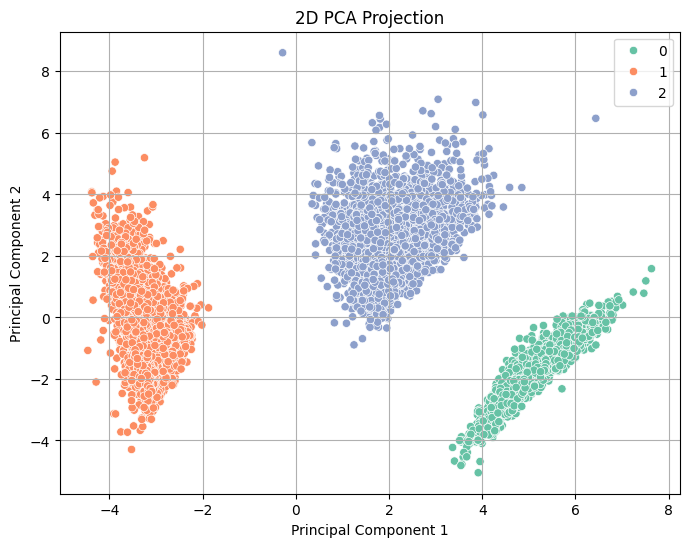

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2',hue=labels,palette='Set2', data=pca_df_2d)
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


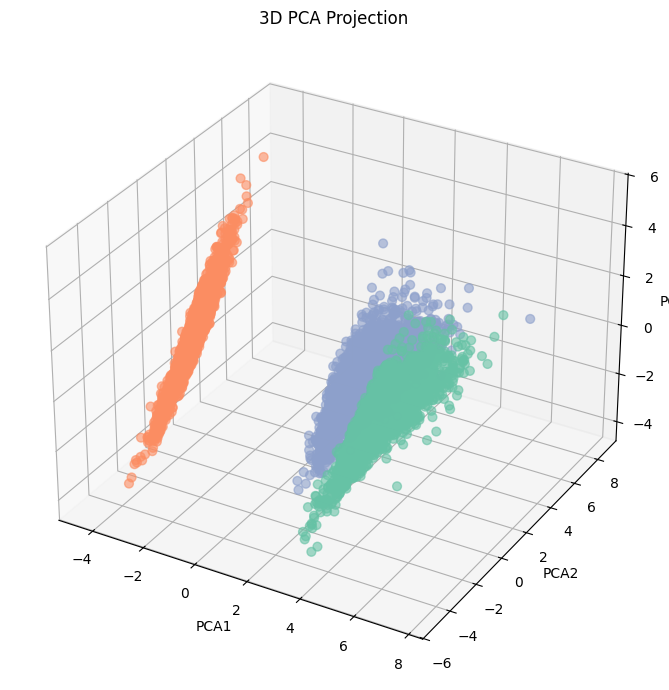

In [51]:
unique_labels = np.unique(labels)
colors = sns.color_palette('Set2', len(unique_labels))
label_color_map = dict(zip(unique_labels, colors))
point_colors = [label_color_map[label] for label in labels]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d['PCA1'], pca_df_3d['PCA2'], pca_df_3d['PCA3'], 
           c=point_colors, s=40, alpha=0.6)

ax.set_title('3D PCA Projection')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.tight_layout()
plt.show()


In [52]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil = silhouette_score(df.to_numpy(), labels)
ch = calinski_harabasz_score(df.to_numpy(), labels)
db = davies_bouldin_score(df.to_numpy(), labels)

print(f"Silhouette Score: {sil:.3f}")
print(f"Calinski-Harabasz Score: {ch:.3f}")
print(f"Davies-Bouldin Score: {db:.3f}")

Silhouette Score: 0.584
Calinski-Harabasz Score: 14834.455
Davies-Bouldin Score: 0.650


k-means results and metrices are better.

# DBSCAN

In [129]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.5, min_samples=15)
labels = dbscan.fit_predict(df)

In [134]:
dbscan_labels = labels

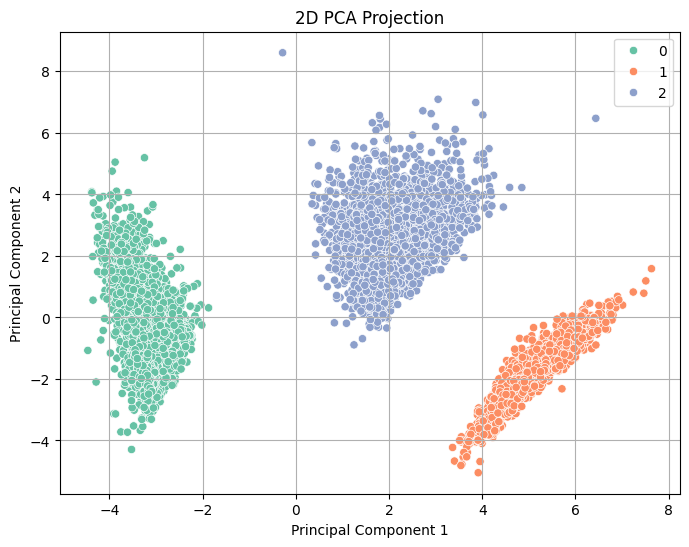

In [131]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2',hue=labels,palette='Set2', data=pca_df_2d)
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


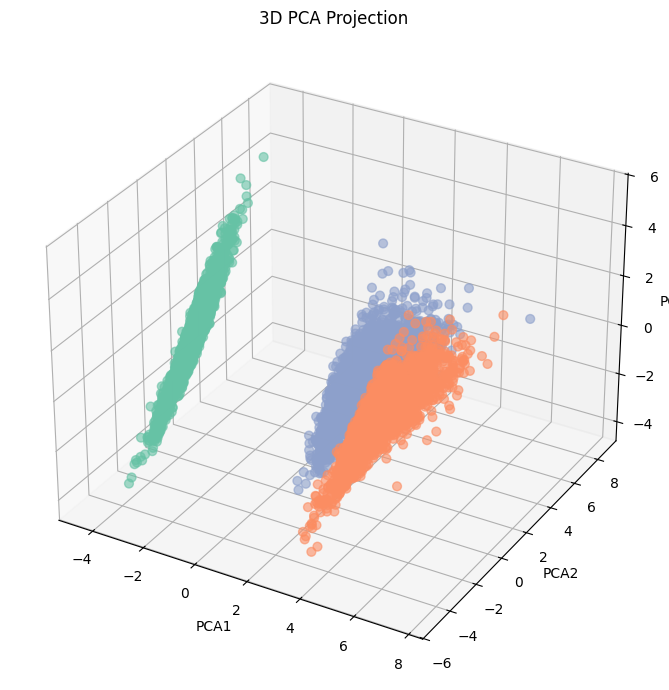

In [132]:
unique_labels = np.unique(labels)
colors = sns.color_palette('Set2', len(unique_labels))
label_color_map = dict(zip(unique_labels, colors))
point_colors = [label_color_map[label] for label in labels]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d['PCA1'], pca_df_3d['PCA2'], pca_df_3d['PCA3'], 
           c=point_colors, s=40, alpha=0.6)

ax.set_title('3D PCA Projection')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.tight_layout()
plt.show()


In [133]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

mask = labels != -1 #exclude outliers

X_filtered = df.to_numpy()[mask]
labels_filtered = labels[mask]

sil = silhouette_score(X_filtered, labels_filtered)
ch = calinski_harabasz_score(X_filtered, labels_filtered)
db = davies_bouldin_score(X_filtered, labels_filtered)

print(f"Silhouette Score (excluding outliers): {sil:.3f}")
print(f"Calinski-Harabasz Score (excluding outliers): {ch:.3f}")
print(f"Davies-Bouldin Score (excluding outliers): {db:.3f}")


Silhouette Score (excluding outliers): 0.584
Calinski-Harabasz Score (excluding outliers): 14834.455
Davies-Bouldin Score (excluding outliers): 0.650


# Saving Best Results

all with same result

In [141]:
df['Cluster'] = dbscan_labels
df.to_csv("../data/processed/df_with_clusters.csv", index=False)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster
0,-1.148577,0.818182,-0.521215,-5.199338,0.166667,0.00,-1.567240,-1.334223,-0.988642,0.000000,0
1,1.028273,0.909091,-5.199338,1.931194,0.000000,0.25,0.793110,1.307333,0.872013,0.222222,1
2,0.802715,1.000000,0.414307,-5.199338,1.000000,0.00,0.911217,-0.307658,0.474946,0.000000,0
3,-0.068391,1.000000,-0.731896,-5.199338,0.083333,0.00,-1.132013,-0.235555,-0.163159,0.000000,0
4,0.557312,1.000000,0.780930,-5.199338,0.666667,0.00,-0.594353,0.377744,1.518141,0.000000,0
